# Bike Sharing Demand

- 도시 자전거 공유 시스템 사용 예측
- [캐글](https://www.kaggle.com)의 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 bike_train.csv bike_test.csv로 저장 

- 자전거 대여량을 예측하는 문제
- Evaluation : Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). 

## 데이터 탐색 및 전처리

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [247]:
%matplotlib inline
plt.style.use('ggplot')
# 스타일 리스트 출력
#plt.style.available

* [Style 정보](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [248]:
bike_train = pd.read_csv('./bike_train.csv')
bike_test = pd.read_csv('./bike_test.csv')
bike_train.shape

(10886, 12)

In [4]:
bike_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


datetime: hourly date + timestamp  
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
weather:  
• 1 = 맑음, 약간 구름 낀 흐림  
• 2 = 안개, 안개 + 흐림  
• 3 = 가벼운 눈, 가벼운 비 + 천둥  
• 4 = 심한 눈/비, 천둥/번개  
temp: 온도(섭씨)   
atemp: 체감온도(섭씨)  
humidity: 상대습도  
windspeed: 풍속  
casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
registered: 사전에 등록된 사용자가 대여한 횟수  
count: 대여 횟수  

In [5]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
bike_train["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
948      1
589      1
629      1
637      1
943      1
Name: count, Length: 822, dtype: int64

In [8]:
bike_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [249]:
bike_train["year"] = pd.to_datetime(bike_train['datetime']).dt.year
bike_train["month"] = pd.to_datetime(bike_train['datetime']).dt.month
bike_train["time"] = pd.to_datetime(bike_train['datetime']).dt.time

In [10]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,04:00:00


In [250]:
bike_train["time"] = pd.to_datetime(bike_train['datetime']).dt.hour

In [12]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


In [251]:
bike_train = bike_train.drop("datetime", axis = 1)

In [14]:
bike_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


In [15]:
bike_train.year.value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [16]:
bike_train.month.value_counts()

8     912
12    912
5     912
6     912
7     912
10    911
11    911
9     909
4     909
2     901
3     901
1     884
Name: month, dtype: int64

In [17]:
bike_train.time.value_counts(dropna=False)

23    456
20    456
16    456
15    456
17    456
22    456
14    456
18    456
21    456
19    456
13    456
12    456
7     455
6     455
0     455
8     455
11    455
10    455
9     455
1     454
5     452
2     448
4     442
3     433
Name: time, dtype: int64

In [18]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  time        10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [252]:
bike_train = bike_train.drop(["casual", "registered"], axis=1)

<AxesSubplot:>

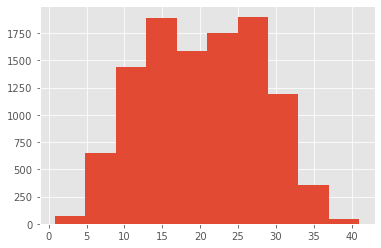

In [20]:
bike_train["temp"].hist()

In [21]:
(bike_train["temp"] > 40).value_counts()

False    10885
True         1
Name: temp, dtype: int64

<AxesSubplot:>

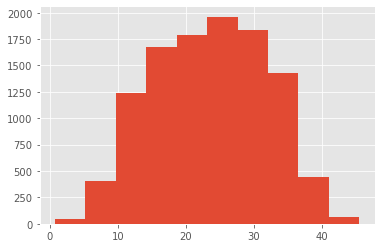

In [22]:
bike_train["atemp"].hist() # 사람의 체온은 보통 섭씨 36.5~37도 사이를 정상 범위

<AxesSubplot:>

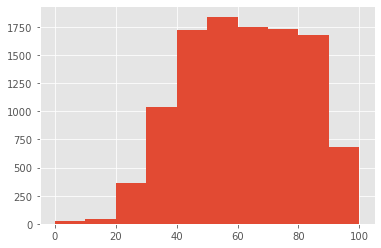

In [23]:
bike_train["humidity"].hist() # 습도가 30% 미만이거나 80% 이상이면 좋지 않고 
# 일단 100과 0을 뺴기

<AxesSubplot:>

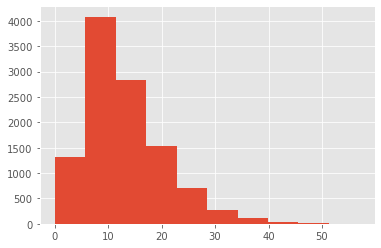

In [24]:
bike_train["windspeed"].hist() # 풍속 0??? 일단 모르겠다.

In [58]:
bike_train["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [253]:
bike_train["windspeed"] = bike_train["windspeed"].replace(0, np.nan)

In [254]:
bike_train["windspeed"].fillna(method = 'bfill', inplace=True)

In [96]:
bike_train["windspeed"].value_counts()

7.0015     1374
8.9981     1332
6.0032     1310
11.0014    1176
12.9980    1127
15.0013     987
16.9979     872
19.0012     694
19.9995     507
22.0028     380
23.9994     276
26.0027     236
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      59
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
47.9988       2
56.9969       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [255]:
from sklearn.preprocessing import OrdinalEncoder

In [256]:
encoder = OrdinalEncoder()
cat_attribs = ['year','season','holiday','workingday','weather']

# encoder = OneHotEncoder(sparse=False)
# cat_attribs = ['year','season','holiday','workingday','weather']

for i in cat_attribs:
    bike_train[i] = encoder.fit_transform(bike_train[i].values.reshape(-1,1)) 

In [257]:
X_train = bike_train.drop("count", axis=1)
y_train = bike_train["count"].copy()

## 모델 훈련

In [258]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [272]:
def rmsle_func(y, pred):
    log_y = np.log(y + 1)
    log_pred = np.log(pred + 1)
    squared_error = (log_y - log_pred)**2
    result = np.sqrt(np.mean(squared_error))
    return result

rmsle_scoreler = make_scorer(rmsle_func, greater_is_better=False) # greater_is_better=False

In [141]:
# 선형 LinearRegression

In [260]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [261]:
y_scores_ln = cross_val_score(lin_reg, X_train, y_train, cv=3, scoring="neg_mean_squared_error")
y_scores_ln = np.sqrt(-y_scores_ln) 
y_scores_ln.mean()

143.114297469716

In [262]:
y_pred_ln = cross_val_predict(lin_reg, X_train, y_train, cv=3)
rmsle = cross_val_score(lin_reg, X_train, y_train, cv=3, scoring= rmsle_scoreler)
rmsle.mean()

<ipython-input-259-1afcd593abac>:3: RuntimeWarning: invalid value encountered in log
  log_pred = np.log(pred + 1)
<ipython-input-259-1afcd593abac>:3: RuntimeWarning: invalid value encountered in log
  log_pred = np.log(pred + 1)


1.2002834273558833

In [34]:
## DecisionTreeRegressor

In [263]:
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [264]:
y_scores_tree = cross_val_score(tree_reg, X_train, y_train, cv=3, scoring="neg_mean_squared_error")
y_scores_tree = np.sqrt(-y_scores_tree) 
y_scores_tree.mean()

96.9379306110337

In [265]:
y_pred_tree = cross_val_predict(tree_reg, X_train, y_train, cv=3)
rmsle = cross_val_score(tree_reg, X_train, y_train, cv=3, scoring= rmsle_scoreler)
rmsle.mean()

0.6322018748451319

In [38]:
# RandomForestRegressor

In [273]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [267]:
y_scores_forest = cross_val_score(forest_reg, X_train, y_train, cv=3, scoring="neg_mean_squared_error")
y_scores_forest = np.sqrt(-y_scores_forest) 
y_scores_forest.mean()

86.72703720784335

In [268]:
y_pred_forest = cross_val_predict(forest_reg, X_train, y_train, cv=3)
rmsle = cross_val_score(forest_reg, X_train, y_train, cv=3, scoring= rmsle_scoreler)
rmsle.mean()

0.5410465844493281

In [42]:
# KNeighborsRegressor

In [269]:
knn_reg = KNeighborsRegressor(n_neighbors = 3)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [270]:
y_scores_knn = cross_val_score(knn_reg, X_train, y_train, cv=3, scoring="neg_mean_squared_error")
y_scores_knn = np.sqrt(-y_scores_knn) 
y_scores_knn.mean()

158.51149741866547

In [271]:
y_pred_knn = cross_val_predict(knn_reg, X_train, y_train, cv=3)
rmsle = cross_val_score(knn_reg, X_train, y_train, cv=3, scoring= rmsle_scoreler)
rmsle.mean()

1.0193748090622612

In [46]:
# RandomForestRegressor이 가장 효율적?

In [274]:
from sklearn.model_selection import GridSearchCV

pamran_grid = [
    {'n_estimators': [100,200,300], 'max_features': [2,4,6,8,10]}
]

grid_search = GridSearchCV(forest_reg, pamran_grid, cv=5, scoring = rmsle_scoreler, n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [100, 200, 300]}],
             scoring=make_scorer(rmsle_func, greater_is_better=False))

In [275]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 300}

In [276]:
grid_search.best_score_

-0.4828614971593231

In [277]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

-0.838707995930173 {'max_features': 2, 'n_estimators': 100}
-0.8422961214006325 {'max_features': 2, 'n_estimators': 200}
-0.8468037085101028 {'max_features': 2, 'n_estimators': 300}
-0.635745738949874 {'max_features': 4, 'n_estimators': 100}
-0.633118001411929 {'max_features': 4, 'n_estimators': 200}
-0.6336645917901624 {'max_features': 4, 'n_estimators': 300}
-0.5297466418007756 {'max_features': 6, 'n_estimators': 100}
-0.5277798634435013 {'max_features': 6, 'n_estimators': 200}
-0.52793958577958 {'max_features': 6, 'n_estimators': 300}
-0.49402294880367953 {'max_features': 8, 'n_estimators': 100}
-0.49107039244580236 {'max_features': 8, 'n_estimators': 200}
-0.4909949706286132 {'max_features': 8, 'n_estimators': 300}
-0.4850301120537037 {'max_features': 10, 'n_estimators': 100}
-0.483232297640661 {'max_features': 10, 'n_estimators': 200}
-0.4828614971593231 {'max_features': 10, 'n_estimators': 300}


In [278]:
final_model = grid_search.best_estimator_

In [52]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [279]:
bike_test["year"] = pd.to_datetime(bike_test['datetime']).dt.year
bike_test["month"] = pd.to_datetime(bike_test['datetime']).dt.month
bike_test["time"] = pd.to_datetime(bike_test['datetime']).dt.time
bike_test["time"] = pd.to_datetime(bike_test['datetime']).dt.hour
bike_test = bike_test.drop("datetime", axis = 1)

In [280]:
bike_train["windspeed"] = bike_train["windspeed"].replace(0, np.nan)
bike_train["windspeed"].fillna(method = 'bfill', inplace=True)

In [281]:
encoder_tt = OrdinalEncoder()
# cat_attribs_tt = ['year','month','time' ,'season','holiday','workingday','weather']

# encoder_tt = OneHotEncoder(sparse=False)
cat_attribs_tt = ['year','season','holiday','workingday','weather']

for i in cat_attribs_tt:
    bike_test[i] = encoder_tt.fit_transform(bike_test[i].values.reshape(-1,1)) 

In [282]:
y_pred = final_model.predict(bike_test)

[Text(0.5, 1.0, 'y_pred')]

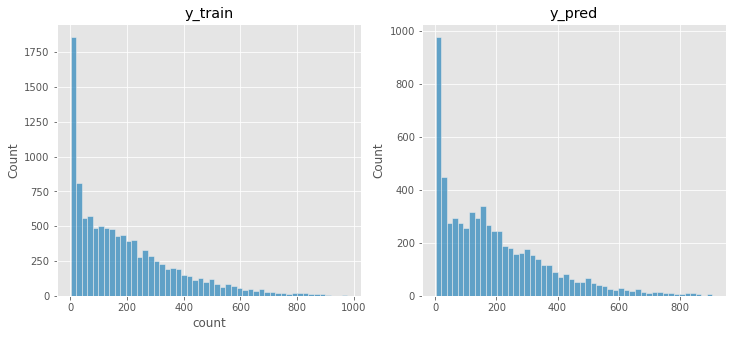

In [283]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.histplot(y_train, ax=ax1, bins=50)
ax1.set(title="y_train")

sns.histplot(y_pred, ax=ax2, bins=50)
ax2.set(title="y_pred")

In [284]:
submission = pd.read_csv("./sampleSubmission.csv")
submission

submission["count"] = y_pred 

print(submission.shape)
submission.head()

ver = 40

submission.to_csv("./ver_{0}_submission.csv".format(ver), index=False)

(6493, 2)
